In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
titanic_df = pd.read_csv("train.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


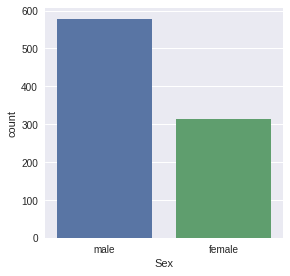

In [15]:
# Lets create a plot that shows the number of passengers by gender
sns.factorplot('Sex', data=titanic_df, kind="count")
plt.show()

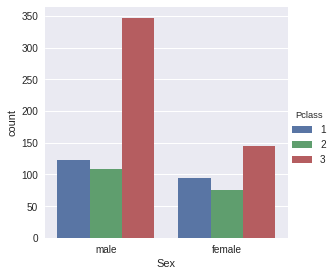

In [19]:
# Let's create a plot that shows the booking classes of the two gender
sns.factorplot("Sex", data=titanic_df, hue='Pclass', kind="count")
plt.show()

Let's reverse this plot and see the number of male and females in each class

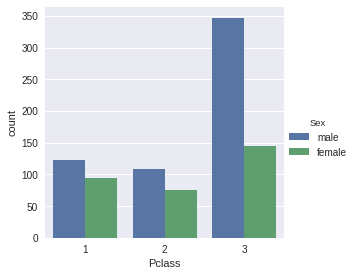

In [20]:
sns.factorplot("Pclass", data = titanic_df, hue="Sex", kind="count")
plt.show()

In [21]:
# Let's divide our passengers data into three categories: male, female and child
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [23]:
# Now lets create a new column called "person" this will store the data showing if the person is male, female or a child
titanic_df["person"] = titanic_df[["Age", "Sex"]].apply(male_female_child, axis=1)

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


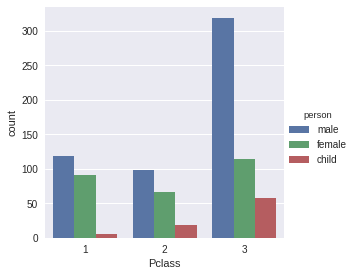

In [25]:
sns.factorplot("Pclass", data=titanic_df, hue="person", kind="count")
plt.show()

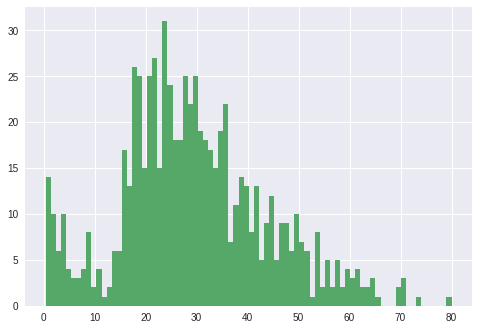

In [27]:
titanic_df["Age"].hist(bins=80)
plt.show()

In [28]:
titanic_df["Age"].mean()

29.69911764705882

In [29]:
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

Now, let's create a kdeplot to show the age based on gender

/home/cn87/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


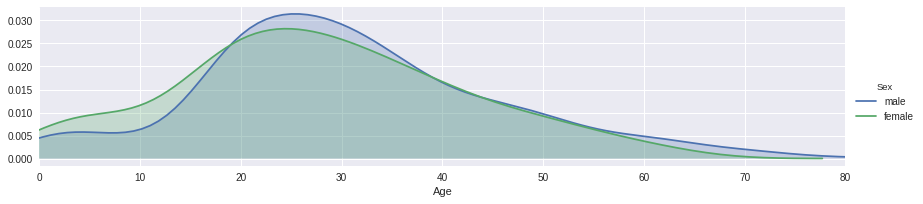

In [34]:
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

plt.show()

/home/cn87/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


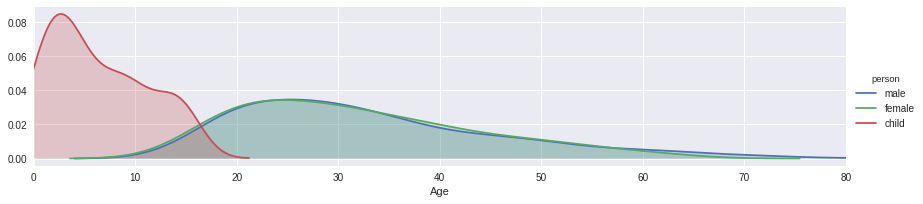

In [35]:
fig = sns.FacetGrid(titanic_df, hue="person", aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

plt.show()

/home/cn87/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


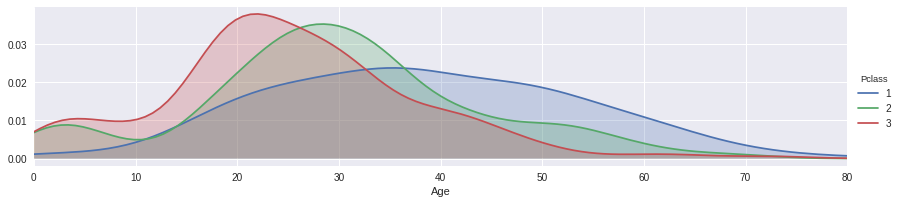

In [36]:
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)

fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim = (0, oldest))

fig.add_legend()

plt.show()